In [ ]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
diagnosis = pd.read_csv('/content/drive/MyDrive/arytmia_data/diagnostics_dataset.csv')

In [ ]:
diagnosis.head()


,FileName,Rhythm,Beat,PatientAge,DateofBirth,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,01-01-1932,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,01-01-1958,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,01-01-1996,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,01-01-1951,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,01-01-1943,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [ ]:
diagnosis['Rhythm'].value_counts()

SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

Extract only four types of arytmia, to do uniform classes

In [ ]:
types = ['AFIB', 'SB', 'ST', 'SR']
diagnosis = diagnosis[diagnosis['Rhythm'].isin(types)]

In [ ]:
diagnosis['Rhythm'].value_counts()

SB      3889
SR      1826
AFIB    1780
ST      1568
Name: Rhythm, dtype: int64

In [ ]:
copy_dataset = diagnosis
diagnosis = diagnosis.drop(columns = ['DateofBirth','Beat', 'FileName'])
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9063 entries, 0 to 9906
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rhythm           9063 non-null   object
 1   PatientAge       9063 non-null   int64 
 2   Gender           9063 non-null   object
 3   VentricularRate  9063 non-null   int64 
 4   AtrialRate       9063 non-null   int64 
 5   QRSDuration      9063 non-null   int64 
 6   QTInterval       9063 non-null   int64 
 7   QTCorrected      9063 non-null   int64 
 8   RAxis            9063 non-null   int64 
 9   TAxis            9063 non-null   int64 
 10  QRSCount         9063 non-null   int64 
 11  QOnset           9063 non-null   int64 
 12  QOffset          9063 non-null   int64 
 13  TOffset          9063 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 1.0+ MB


Encode gender into int type

In [ ]:
lb_make = LabelEncoder()
diagnosis['Gender'] = lb_make.fit_transform(diagnosis['Gender'])
diagnosis.head(10)

,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,AFIB,85,1,117,234,114,356,496,81,-27,19,208,265,386
1,SB,59,0,52,52,92,432,401,76,42,8,215,261,431
3,SB,66,1,53,53,96,456,427,34,3,9,219,267,447
5,SB,46,0,57,57,70,404,393,38,24,9,225,260,427
6,AFIB,80,0,98,86,74,360,459,69,83,17,215,252,395
7,SR,46,1,63,63,90,376,384,24,38,11,221,266,409
8,SB,45,1,59,59,84,390,386,78,68,10,218,260,413
9,SB,47,0,58,58,80,420,412,80,48,10,212,252,422
10,SB,63,1,55,55,80,436,417,74,74,9,223,263,441
11,ST,77,1,120,120,70,306,432,39,28,20,225,260,378


Encode Rhytm type into int

In [ ]:
lb_make = LabelEncoder()
diagnosis['Rhythm'] = lb_make.fit_transform(diagnosis['Rhythm'])
diagnosis.head(10)

,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,0,85,1,117,234,114,356,496,81,-27,19,208,265,386
1,1,59,0,52,52,92,432,401,76,42,8,215,261,431
3,1,66,1,53,53,96,456,427,34,3,9,219,267,447
5,1,46,0,57,57,70,404,393,38,24,9,225,260,427
6,0,80,0,98,86,74,360,459,69,83,17,215,252,395
7,2,46,1,63,63,90,376,384,24,38,11,221,266,409
8,1,45,1,59,59,84,390,386,78,68,10,218,260,413
9,1,47,0,58,58,80,420,412,80,48,10,212,252,422
10,1,63,1,55,55,80,436,417,74,74,9,223,263,441
11,3,77,1,120,120,70,306,432,39,28,20,225,260,378


Save data-set

In [ ]:
df = diagnosis
df.to_csv('/content/drive/MyDrive/arytmia_data/dataset', sep=',')

Create model for Categorical Classification of Arytmia Types

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [ ]:
x = df.iloc[:,1:14]
y = df.iloc[:,0]

In [ ]:
x.shape[1]

13

In [ ]:
model = Sequential()
model.add(keras.layers.Dense(13,  activation = 'relu', input_dim = x.shape[1] )) 
model.add(keras.layers.Dense(240,  activation = 'relu'))
model.add(keras.layers.Dense(36,  activation = 'relu'))
model.add(keras.layers.Dense(12,  activation = 'relu'))
model.add(keras.layers.Dense(4, activation = 'softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer= "Adam", metrics=['accuracy'])

In [ ]:
print(len(model.layers))
print(model.summary())

5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 13)                182       
                                                                 
 dense_6 (Dense)             (None, 240)               3360      
                                                                 
 dense_7 (Dense)             (None, 36)                8676      
                                                                 
 dense_8 (Dense)             (None, 12)                444       
                                                                 
 dense_9 (Dense)             (None, 4)                 52        
                                                                 
Total params: 12,714
Trainable params: 12,714
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
history = model.fit(x_train, y_train, epochs = 150, validation_split = 0.25)

Epoch 1/150
170/170 [==============================] - 2s 4ms/step - loss: 1.0577 - accuracy: 0.7061 - val_loss: 0.5429 - val_accuracy: 0.8036
Epoch 2/150
170/170 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.7942 - val_loss: 0.5478 - val_accuracy: 0.8064
Epoch 3/150
170/170 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.8087 - val_loss: 0.6158 - val_accuracy: 0.7457
Epoch 4/150
170/170 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.8317 - val_loss: 0.4392 - val_accuracy: 0.8373
Epoch 5/150
170/170 [==============================] - 1s 4ms/step - loss: 0.4688 - accuracy: 0.8350 - val_loss: 0.5016 - val_accuracy: 0.8213
Epoch 6/150
170/170 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.8446 - val_loss: 0.3797 - val_accuracy: 0.8665
Epoch 7/150
170/170 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8519 - val_loss: 0.3838 - val_accuracy: 0.8560

In [ ]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.7060878872871399, 0.7941879630088806, 0.8087180256843567, 0.8317086696624756, 0.8350192904472351, 0.8445833921432495, 0.851940393447876, 0.8600330948829651, 0.8591134548187256, 0.8655508756637573, 0.8681257963180542, 0.8712525367736816, 0.8764024376869202, 0.8751149773597717, 0.8784255981445312, 0.8743792772293091, 0.8741953372955322, 0.8832076787948608, 0.8916682004928589, 0.8896450400352478, 0.8865182995796204, 0.887253999710083, 0.8841272592544556, 0.8815523386001587, 0.8885414600372314, 0.8846790790557861, 0.8826558589935303, 0.8813683986663818, 0.8944270610809326, 0.8968181014060974, 0.9004966020584106, 0.8879896998405457, 0.8968181014060974, 0.8938753008842468, 0.899760901927948, 0.9028876423835754, 0.8931396007537842, 0.897921621799469, 0.9045429229736328, 0.9003126621246338, 0.8986573219299316, 0.9010483622550964, 0.9038072228431702, 0.8971859216690063, 0.9012323021888733, 0.8958984613418579, 0.906198263168335, 0.90

Show plot of accuracy and loss

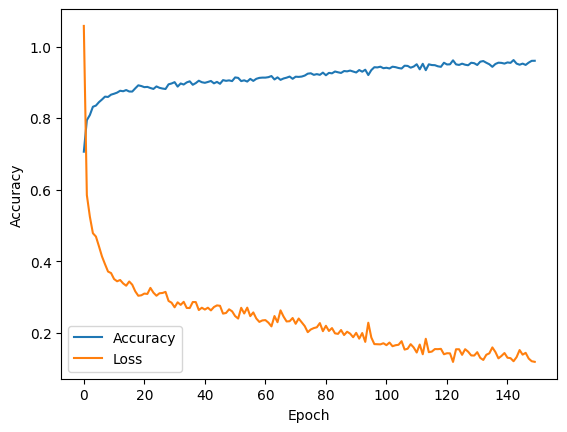

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
#plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

TEST model on test_data

In [ ]:
test_history = model.evaluate(x_test,y_test)

57/57 [==============================] - 0s 1ms/step - loss: 0.2628 - accuracy: 0.9333


# Save model in *.h5 - format

In [ ]:
model.save('/content/drive/MyDrive/arytmia_data/model_10_05.h5')